# SQL

In [1]:
# importing the libraries
import csv
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# we want out plots to apear inside the notebook 
%matplotlib inline 

In [2]:
# Import CSV into DataFrame
path = 'KCPD_Crime_Data_2021.csv'
dtypes = {
    'Beat': 'int',
    'Zip Code': 'int',
    'Area': 'string',
    'DVFlag': 'bool',
    'Firearm Used Flag': 'bool',
    'Description': 'string'
}

# Read the CSV file and select only the desired columns
columns_to_keep = ['Beat', 'Zip Code', 'Area', 'DVFlag', 'Firearm Used Flag', 'Description']
raw_df = pd.read_csv(path)
raw_df.head()

,Description,Beat,Zip Code,Area,DVFlag,Firearm Used Flag
0,Murder,332,64128,EPD,False,True
1,Theft From Building,234,64114,MPD,False,False
2,Aggravated Assault,631,64116,SCP,False,True
3,NaN,113,64105,CPD,False,False
4,Motor Vehicle Theft,211,64130,MPD,False,False


In [3]:
#create database for table import 
import psycopg2
import json
#change database creds to postgres db
with open('create_database_creds.json') as O:
    config = json.load(O)
username = config['user']
password = config['password']
db_host = config['host']
db_port = config['port']
db_ = 'crime_data_db'
conn = psycopg2.connect(
    host=db_host,
    port=db_port,
    user=username,
    password=password,
)
conn.autocommit = True
cursor = conn.cursor()
#create database to house table
cursor.execute(f"CREATE DATABASE {db_}")
cursor.close()
conn.close()

DuplicateDatabase: database "crime_data_db" already exists


In [4]:

from sqlalchemy import create_engine
#upload dataframe into postgres
# Replace these values with your PostgreSQL database credentials
db_username = config['user']
db_password = config['password']
db_host = config['host']
db_port = config['port']
db_name = 'crime_data_db'

#open engine
connection_path = f"postgresql://{db_username}:{db_password}@{db_host}:{db_port}/{db_name}"
engine = create_engine(connection_path)

table_name = 'crime_data'
#import data into db
raw_df.to_sql(table_name, engine, if_exists='replace', index=False)
raw_df


,Description,Beat,Zip Code,Area,DVFlag,Firearm Used Flag
0,Murder,332,64128,EPD,False,True
1,Theft From Building,234,64114,MPD,False,False
2,Aggravated Assault,631,64116,SCP,False,True
3,NaN,113,64105,CPD,False,False
4,Motor Vehicle Theft,211,64130,MPD,False,False
...,...,...,...,...,...,...
92122,Theft of Vehicle Parts and Accessories,123,64108,CPD,False,False
92123,Aggravated Assault,115,64108,CPD,False,False
92124,Shoplifting,345,64133,EPD,False,False
92125,Stolen Property Offenses,131,64111,CPD,False,False


### CLEANING and EDA

In [5]:
df = raw_df.dropna()
df = df[df['Area'] != 'OSPD']
df

,Description,Beat,Zip Code,Area,DVFlag,Firearm Used Flag
0,Murder,332,64128,EPD,False,True
1,Theft From Building,234,64114,MPD,False,False
2,Aggravated Assault,631,64116,SCP,False,True
4,Motor Vehicle Theft,211,64130,MPD,False,False
5,Aggravated Assault,222,64130,MPD,False,False
...,...,...,...,...,...,...
92121,Aggravated Assault,143,64110,CPD,True,False
92122,Theft of Vehicle Parts and Accessories,123,64108,CPD,False,False
92123,Aggravated Assault,115,64108,CPD,False,False
92124,Shoplifting,345,64133,EPD,False,False


In [6]:
substring = '/'
filter = df['Description'].str.contains(substring)
df = df[~filter]
df

,Description,Beat,Zip Code,Area,DVFlag,Firearm Used Flag
0,Murder,332,64128,EPD,False,True
1,Theft From Building,234,64114,MPD,False,False
2,Aggravated Assault,631,64116,SCP,False,True
4,Motor Vehicle Theft,211,64130,MPD,False,False
5,Aggravated Assault,222,64130,MPD,False,False
...,...,...,...,...,...,...
92121,Aggravated Assault,143,64110,CPD,True,False
92122,Theft of Vehicle Parts and Accessories,123,64108,CPD,False,False
92123,Aggravated Assault,115,64108,CPD,False,False
92124,Shoplifting,345,64133,EPD,False,False


In [7]:
df

,Description,Beat,Zip Code,Area,DVFlag,Firearm Used Flag
0,Murder,332,64128,EPD,False,True
1,Theft From Building,234,64114,MPD,False,False
2,Aggravated Assault,631,64116,SCP,False,True
4,Motor Vehicle Theft,211,64130,MPD,False,False
5,Aggravated Assault,222,64130,MPD,False,False
...,...,...,...,...,...,...
92121,Aggravated Assault,143,64110,CPD,True,False
92122,Theft of Vehicle Parts and Accessories,123,64108,CPD,False,False
92123,Aggravated Assault,115,64108,CPD,False,False
92124,Shoplifting,345,64133,EPD,False,False


In [8]:
# Turning DVFlag and Firearm Used Flag into 1 and 0 

df[["DVFlag", "Firearm Used Flag"]] = df[["DVFlag", "Firearm Used Flag"]].applymap(lambda x: 1 if x == True else 0)
df.head()

/var/folders/kr/rf7rhds12g1dhglkgtrbcpd80000gn/T/ipykernel_73692/2533950045.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[["DVFlag", "Firearm Used Flag"]] = df[["DVFlag", "Firearm Used Flag"]].applymap(lambda x: 1 if x == True else 0)


,Description,Beat,Zip Code,Area,DVFlag,Firearm Used Flag
0,Murder,332,64128,EPD,0,1
1,Theft From Building,234,64114,MPD,0,0
2,Aggravated Assault,631,64116,SCP,0,1
4,Motor Vehicle Theft,211,64130,MPD,0,0
5,Aggravated Assault,222,64130,MPD,0,0


In [9]:
import pandas as pd

# Assuming df is your DataFrame
df["Zip Code"] = df["Zip Code"].astype(int)

# Check the data types after conversion
print(df.dtypes)


Description          object
Beat                 object
Zip Code              int64
Area                 object
DVFlag                int64
Firearm Used Flag     int64
dtype: object


/var/folders/kr/rf7rhds12g1dhglkgtrbcpd80000gn/T/ipykernel_73692/3652048394.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Zip Code"] = df["Zip Code"].astype(int)


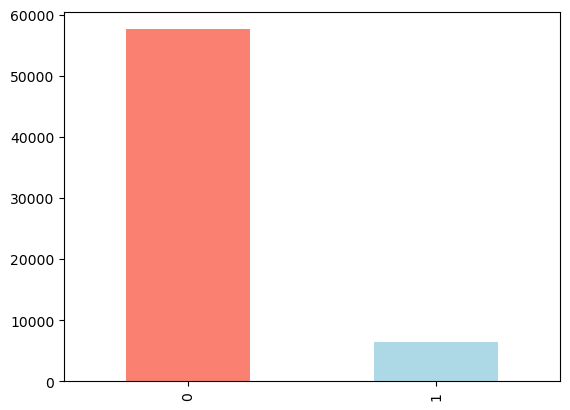

In [10]:
# Ploting to understand the variable 
df["DVFlag"].value_counts().plot(kind = "bar", color = ["salmon", "lightblue"]);

In [11]:
# are there any missing values
df.isna().sum()

Description          0
Beat                 0
Zip Code             0
Area                 0
DVFlag               0
Firearm Used Flag    0
dtype: int64

In [12]:
df.describe()

,Zip Code,DVFlag,Firearm Used Flag
count,64093.000000,64093.000000,64093.000000
mean,64103.345295,0.101337,0.113819
std,1118.779994,0.301777,0.317594
min,6106.000000,0.000000,0.000000
25%,64112.000000,0.000000,0.000000
50%,64127.000000,0.000000,0.000000
75%,64132.000000,0.000000,0.000000
max,66126.000000,1.000000,1.000000


In [13]:
df["Firearm Used Flag"].value_counts()

0    56798
1     7295
Name: Firearm Used Flag, dtype: int64

In [14]:
# Compare DVFlag with Firearm used 
pd.crosstab(df.DVFlag, df["Firearm Used Flag"])

Firearm Used Flag,0,1
DVFlag,,
0,50913,6685
1,5885,610


(array([0, 1]), [Text(0, 0, '0'), Text(1, 0, '1')])

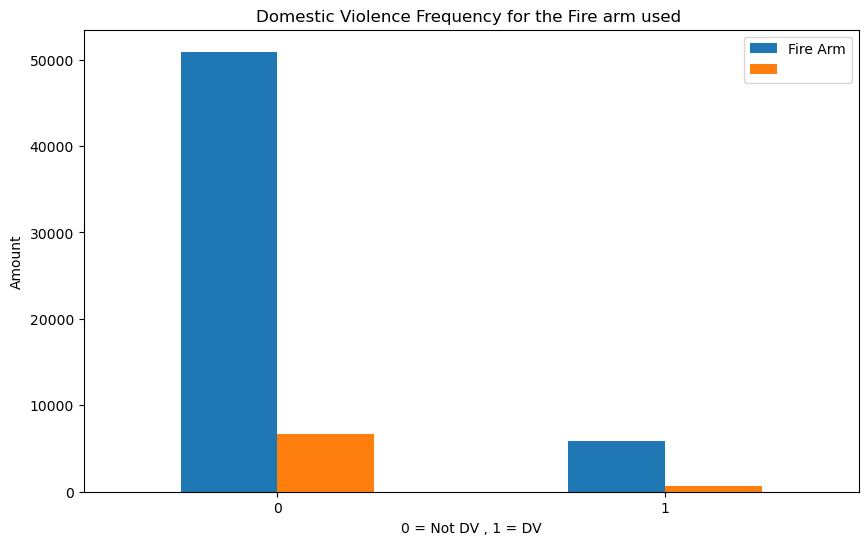

In [15]:
# Create a plot of crosstab
pd.crosstab(df.DVFlag, df["Firearm Used Flag"]).plot(kind = "bar",
                                                    figsize = (10,6)
                                                    )
plt.title("Domestic Violence Frequency for the Fire arm used ")
plt.xlabel("0 = Not DV , 1 = DV")
plt.ylabel("Amount")
plt.legend(["Fire Arm", ""]);
plt.xticks(rotation = 0)

# PREPROCESSING

In [34]:
ohe_crime = pd.get_dummies(df[['Description','Area', 'Beat']])
ohe_crime

,Description_Aggravated Assault,Description_All Other Larceny,Description_All Other Offenses,Description_Animal Cruelty,Description_Arson,Description_Assisting or Promoting Prostitution,Description_Bad Checks,Description_Commercial Sex Acts,Description_DV Related Suicide,Description_Disorderly Conduct,...,Beat_632,Beat_633,Beat_634,Beat_635,Beat_636,Beat_641,Beat_642,Beat_643,Beat_644,Beat_999
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92121,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
92122,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
92123,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
92124,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [35]:
X = df[['Description','Beat','Zip Code','Area', 'DVFlag','Firearm Used Flag']]
X

,Description,Beat,Zip Code,Area,DVFlag,Firearm Used Flag
0,Murder,332,64128,EPD,0,1
1,Theft From Building,234,64114,MPD,0,0
2,Aggravated Assault,631,64116,SCP,0,1
4,Motor Vehicle Theft,211,64130,MPD,0,0
5,Aggravated Assault,222,64130,MPD,0,0
...,...,...,...,...,...,...
92121,Aggravated Assault,143,64110,CPD,1,0
92122,Theft of Vehicle Parts and Accessories,123,64108,CPD,0,0
92123,Aggravated Assault,115,64108,CPD,0,0
92124,Shoplifting,345,64133,EPD,0,0


In [36]:
X = pd.concat([X[['DVFlag', 'Firearm Used Flag']], ohe_crime], axis=1)
X

,DVFlag,Firearm Used Flag,Description_Aggravated Assault,Description_All Other Larceny,Description_All Other Offenses,Description_Animal Cruelty,Description_Arson,Description_Assisting or Promoting Prostitution,Description_Bad Checks,Description_Commercial Sex Acts,...,Beat_632,Beat_633,Beat_634,Beat_635,Beat_636,Beat_641,Beat_642,Beat_643,Beat_644,Beat_999
0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92121,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
92122,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
92123,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
92124,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [39]:
y = df['Zip Code']
y.unique()

array([64128, 64114, 64116, 64130, 64134, 64138, 64127, 64119, 64111,
       64161, 64109, 64106, 64133, 64155, 64110, 64158, 64112, 64129,
       64137, 64132, 64153, 64145, 64131, 64105, 64108, 64126, 64113,
       64118, 64124, 64154, 64117, 64120, 64151, 64139, 64125, 64152,
       63131, 64115, 64147, 64157, 64146, 64101, 64149, 64123, 64102,
       64318, 64053, 64136, 64156, 66126, 64164, 64163,  6411, 64515,
       64012, 64068, 65129, 64079, 64052, 64218, 64166, 64122, 64165,
       64199, 64121,  6106, 50023, 64014, 64055, 64217, 64159, 64015,
       61408, 64104, 64103, 61441, 64016, 64135, 64150,  6432, 64160])

In [40]:
print("X shape:", X.shape)
print("y shape:", y.shape)


X shape: (64093, 138)
y shape: (64093,)


In [41]:
#Machine Learning

In [42]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

In [44]:
X_train.value_counts()

DVFlag  Firearm Used Flag  Description_Aggravated Assault  Description_All Other Larceny  Description_All Other Offenses  Description_Animal Cruelty  Description_Arson  Description_Assisting or Promoting Prostitution  Description_Bad Checks  Description_Commercial Sex Acts  Description_DV Related Suicide  Description_Disorderly Conduct  Description_Driving Under the Influence  Description_Drug Equipment Violations  Description_Drunkenness  Description_Embezzlement  Description_Family Offenses, Nonviolent  Description_Forcible Fondling  Description_Forcible Rape  Description_Forcible Sodomy  Description_Identity Theft  Description_Impersonation  Description_Incest  Description_Intimidation  Description_Justifiable Homicide  Description_Liquor Law Violations  Description_Motor Vehicle Theft  Description_Murder  Description_Pocket-Picking  Description_Prostitution  Description_Purchasing Prostitution  Description_Purse-Snatching  Description_Robbery  Description_Sexual Assault With An Obj

In [45]:
X_train.shape

(51274, 138)

In [46]:
y_train.shape

(51274,)

In [47]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import CategoricalNB

from sklearn.naive_bayes import CategoricalNB
clf = CategoricalNB()
clf.fit(X_train, y_train)

CategoricalNB()

In [48]:
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix,
    ConfusionMatrixDisplay,
    f1_score,
)


y_pred = clf.predict(X_test)
accuray = accuracy_score(y_pred, y_test)
f1 = f1_score(y_pred, y_test, average="weighted")

print(classification_report(y_test, y_pred))
print("Accuracy:", accuray)
print("F1 Score:", f1)

              precision    recall  f1-score   support

        6106       0.00      0.00      0.00         1
        6411       0.00      0.00      0.00         7
       61408       0.00      0.00      0.00         1
       61441       0.00      0.00      0.00         1
       64012       0.00      0.00      0.00         3
       64015       0.00      0.00      0.00         1
       64053       0.00      0.00      0.00         2
       64068       0.00      0.00      0.00         1
       64101       0.20      0.03      0.06        29
       64102       0.00      0.00      0.00        32
       64105       0.53      0.61      0.57       253
       64106       0.57      0.67      0.62       554
       64108       0.67      0.84      0.75       590
       64109       0.78      0.79      0.78       385
       64110       0.68      0.59      0.63       415
       64111       0.85      0.93      0.89       946
       64112       0.59      0.45      0.51       261
       64113       0.29    

/Users/brettsquires/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/brettsquires/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/brettsquires/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result)

In [ ]:
X_test.iloc[100].values

In [ ]:
clf.predict([['332', '64128', 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0]])

In [ ]:
y_test.iloc[99]

In [ ]:
from joblib import dump
dump(clf, 'crime_prediction.joblib') 